<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_%EA%B8%B0%EB%A7%90%EA%B3%BC%EC%A0%9C%EB%AC%BC(%EB%B0%95%EC%8A%B9%ED%9D%AC%2C202035_368335).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1번
* numcredits변수에 factor()함수 적용
* dummy함수 적용

In [1]:
#german 데이터 불러오기
german_url = 'https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt'
german = read.table(german_url, header = T)
head(german)
attach(german)

,check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good


In [2]:
class(numcredits)
summary(numcredits)
head(numcredits)
tail(numcredits)

[1] "integer"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.407   2.000   4.000 

[1] 2 1 1 1 2 1

[1] 1 1 1 1 1 1

In [3]:
german$numcredits = factor(german$numcredits)
class(german$numcredits)
summary(german$numcredits)
head(german$numcredits)
tail(german$numcredits)

[1] "factor"

1   2   3   4 
633 333  28   6

[1] 2 1 1 1 2 1
Levels: 1 2 3 4

[1] 1 1 1 1 1 1
Levels: 1 2 3 4

In [4]:
#residence, residpeople 범주형으로 변환(실제 범주형인데 수치형으로 인식됨)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)

In [5]:
#factor 전 데이터 가져오기
german_d = read.table(german_url, header = T)

In [6]:
install.packages('dummy')
library(dummy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummy 0.1.3

dummyNews()



In [7]:
#순서가 있는 범주형 변수이지만 최근 R에서는 순서를 인지 하지 못하여 ordered함수로 순서형 팩터를 생성함
german_d$check = ordered(german_d$check)
german_d$history = ordered(german_d$history)
german_d$savings = ordered(german_d$savings)
german_d$employment = ordered(german_d$employment)
german_d$property = ordered(german_d$property)
german_d$others = ordered(german_d$others)
german_d$telephone = ordered(german_d$telephone)
german_d$foreign = ordered(german_d$foreign)

In [8]:
dvar = c(4, 9, 10, 15, 17) #purpose, personal, debtors, job, telephone(명목형 변수)
german2 = dummy(x = german_d[, dvar]) # 명목형 변수를 더미변수화
german2 = german2[, -c(10, 14, 17, 20, 24)] #중복변수 삭제
german2 = cbind(german_d[, -dvar], german2) # 변수결합 
#순서가 있는 범주형 변수의 수치형 변수화
for(i in 1:ncol(german2)) if(!is.numeric(german2[, i])) german2[, i]=as.numeric(german2[,i]) 
german2$y = ifelse(german$y == 'good', 1, 0) # 목표변수 변환

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [9]:
head(german2)

,check,duration,history,credit,savings,employment,installment,residence,property,age,⋯,personal_A91,personal_A92,personal_A93,debtors_A101,debtors_A102,housing_A151,housing_A152,job_A171,job_A172,job_A173
,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6,5,1169,5,5,4,4,1,67,⋯,0,0,1,1,0,0,1,0,0,1
2,2,48,3,5951,1,3,2,2,1,22,⋯,0,1,0,1,0,0,1,0,0,1
3,4,12,5,2096,1,4,2,3,1,49,⋯,0,0,1,1,0,0,1,0,1,0
4,1,42,3,7882,1,4,2,4,2,45,⋯,0,0,1,0,0,0,0,0,0,1
5,1,24,4,4870,1,3,3,4,4,53,⋯,0,0,1,1,0,0,0,0,0,1
6,4,36,3,9055,5,3,2,4,4,35,⋯,0,0,1,1,0,0,0,0,1,0


In [10]:
table(german$purpose)


 A40  A41 A410  A42  A43  A44  A45  A46  A48  A49 
 234  103   12  181  280   12   22   50    9   97 

In [11]:
#일부 데이터만 확인 : check, purpose, duration, numcredits
var = c(1, 2, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25)
head(german2[, var])

,check,duration,numcredits,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6,2,0,0,0,0,1,0,0,0,0
2,2,48,1,0,0,0,0,1,0,0,0,0
3,4,12,1,0,0,0,0,0,0,0,1,0
4,1,42,1,0,0,0,1,0,0,0,0,0
5,1,24,2,1,0,0,0,0,0,0,0,0
6,4,36,1,0,0,0,0,0,0,0,1,0


In [12]:
#dummy()함수를 파악하기 위해 일부 변수만 사용함
var = c(1,2, 4, 16)
german_dummy = german_d[, var]
head(german_dummy) 

,check,duration,purpose,numcredits
,<ord>,<int>,<chr>,<int>
1,A11,6,A43,2
2,A12,48,A43,1
3,A14,12,A46,1
4,A11,42,A42,1
5,A11,24,A40,2
6,A14,36,A46,1


In [13]:
#dummy()함수로 가변수생성
gdummy = dummy(german_dummy)
head(gdummy)

,check_A11,check_A12,check_A13,check_A14,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [14]:
german_d$numcredits = factor(german_d$numcredits)
german_dummy = german_d[, var]
head(german_dummy) 

,check,duration,purpose,numcredits
,<ord>,<int>,<chr>,<fct>
1,A11,6,A43,2
2,A12,48,A43,1
3,A14,12,A46,1
4,A11,42,A42,1
5,A11,24,A40,2
6,A14,36,A46,1


In [15]:
gdummy = dummy(german_dummy)
head(gdummy)

,check_A11,check_A12,check_A13,check_A14,purpose_A40,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,numcredits_1,numcredits_2,numcredits_3,numcredits_4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


#5번 : 신경망
* 50%(종별25개) - 학습데이터
* seed : 368335(학번 뒷자리)
* 나머지로 종류분류 평가
* 신경망 구조도 출력

In [16]:
#패키지
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
head(iris, 3)
tail(iris, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [18]:
#목표변수 Species -> 수치형 변환
#setosa = 1
#versicolor = 2
#virginica = 3
iris$Species = ifelse(iris$Species == "setosa", 1, 
              +        ifelse(iris$Species == "versicolor", 2, 3))
iris$Species

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

In [19]:
#train data
set.seed(368335)
i <- c(sample(1:50, 25), sample(51:100, 25), sample(101:150, 25))

#표준화
max.iris = apply(iris, 2, max)
min.iris = apply(iris, 2, min)

ziris = scale(iris, center = min.iris, scale = max.iris - min.iris)
ziris = as.data.frame(ziris)

#훈련/검증 데이터 분리
train <- ziris[i, ]
test <- ziris[-i, ]

In [20]:
#신경망 학습
n = names(train)
form = as.formula(paste("Species ~ ", paste(n[!n %in% "Species"], collapse = "+")))
nn1 = neuralnet(form, data = train, hidden = c(5, 3), linear.output = F)

In [21]:
install.packages("devtools")
library(devtools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: usethis



Loading required package: scales

Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = 

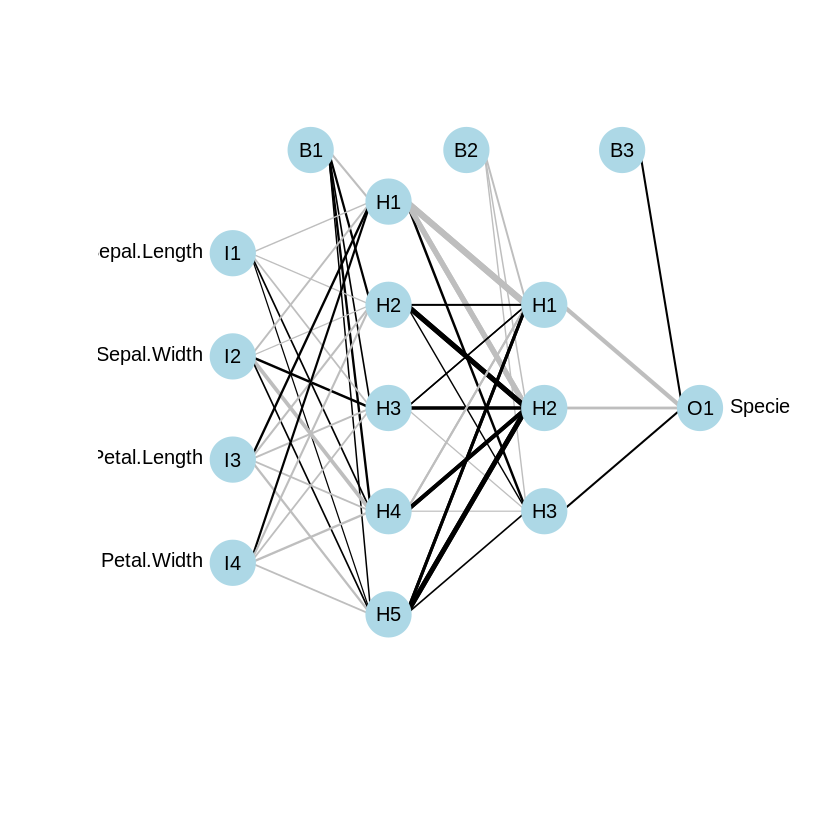

In [22]:
source('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
plot.nnet(nn1)

In [23]:
#예측(첫번째 은닉층5개, 두번째 은닉층 3개)
pred.nn1 = compute(nn1, test)

#원래대로 환원
pred1 = pred.nn1$net.result*(max(iris$Species)-min(iris$Species))+min(iris$Species)

#m1값미만 : 1(setosa)/ m2이상 3(virginica)
#경계라인 : (max-min)/3을 기준으로 분류
d = max(pred1)-min(pred1)
m1 = min(pred1)+(d/3)
m2 = max(pred1)-(d/3)

pred.nn2 = ifelse(pred1<m1, 1,
            +ifelse(pred1>= m1 & pred1 < m2, 2, 3))

In [24]:
#오분류율
# 테스트 데이터의 5열(종)과 예측값 비교해서 틀린 개수 / 테스트 데이터의 갯수
sum(iris[-i, 5] != pred.nn2) / length(iris[-i, 5])

[1] 0.01333333

In [25]:
#오분류표
table(iris[-i, 5], pred.nn2)

   pred.nn2
     1  2  3
  1 25  0  0
  2  0 25  0
  3  0  1 24

#6번 USArrests 군집분석(맨해탄거리)
1. 단일연결법, 완전연결법, 평균연결법으로 군집화 & 나무그림
2. DIANA를 이용한 군집화 & 나무형 그림
3. 몇개의 군집을 좋을지 판단
4. 위 결과를 바탕으로 k-평균 군집분석 실시


In [26]:
#데이터 가져오기
head(USArrests)
summary(USArrests)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

In [27]:
#계층적군집분석을 위해 거리를 구함
USA.dist = dist(USArrests)
#k평균 군집분석을 위해 행렬화
USArrests2 = as.matrix(USArrests)

In [28]:
USA.hclusting1 = hclust(USA.dist, method = 'single') #단일연결법
USA.hclusting2 = hclust(USA.dist, method = 'complete') #완전연결법
USA.hclusting3 = hclust(USA.dist, method = "average") #평균연결법

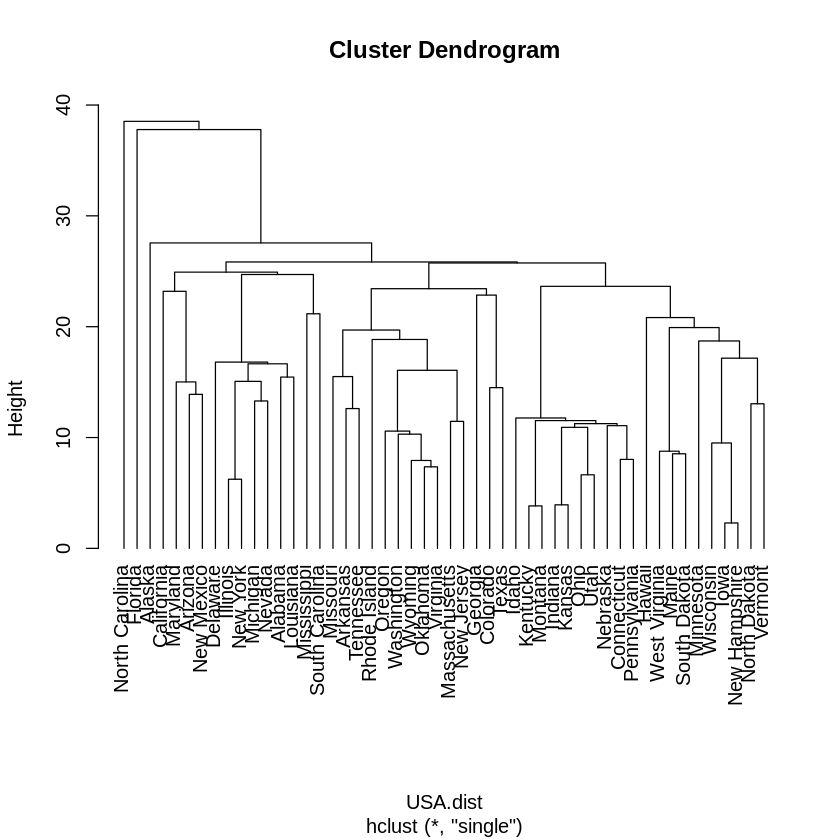

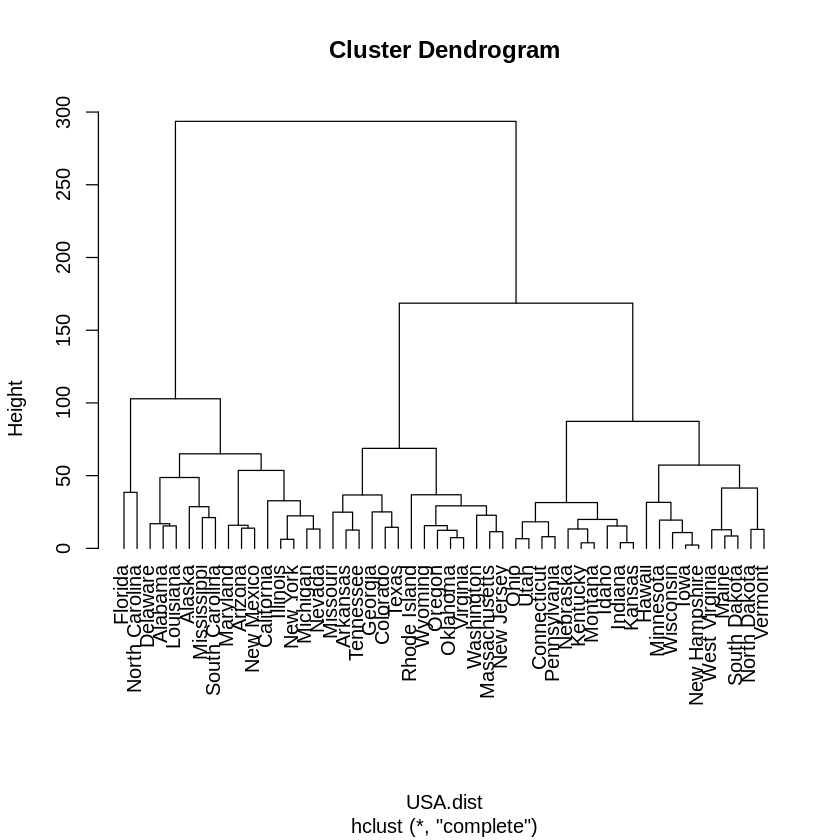

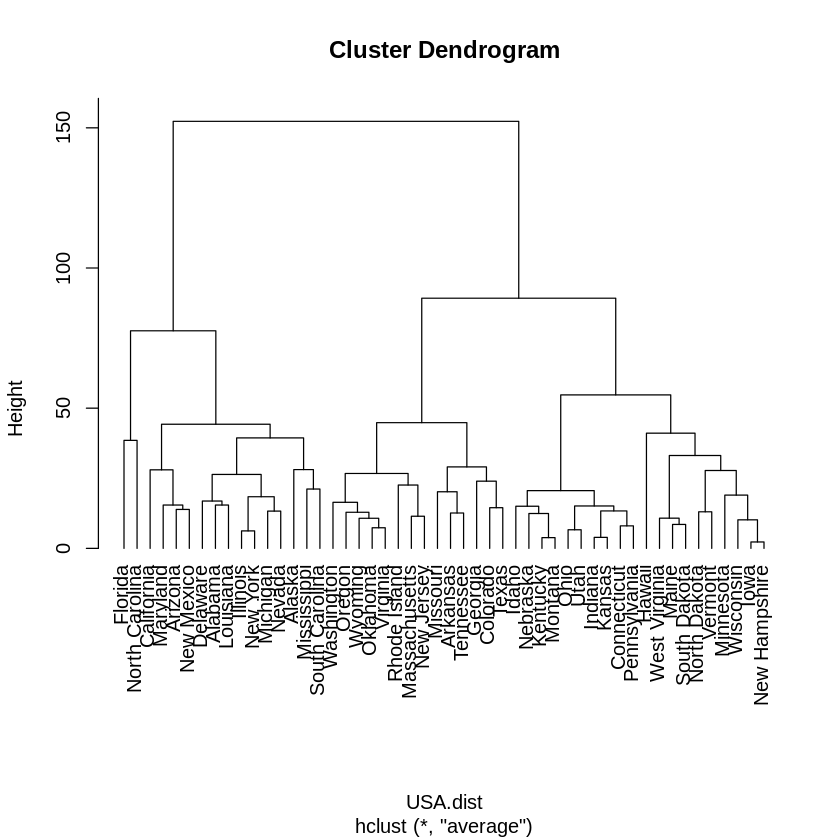

In [29]:
#나무그림
plot(USA.hclusting1, hang=-1)
plot(USA.hclusting2, hang=-1)
plot(USA.hclusting3, hang=-1)

In [30]:
#분할분석(DIANA)
library(cluster)
USA.divclustering = diana(USArrests2)

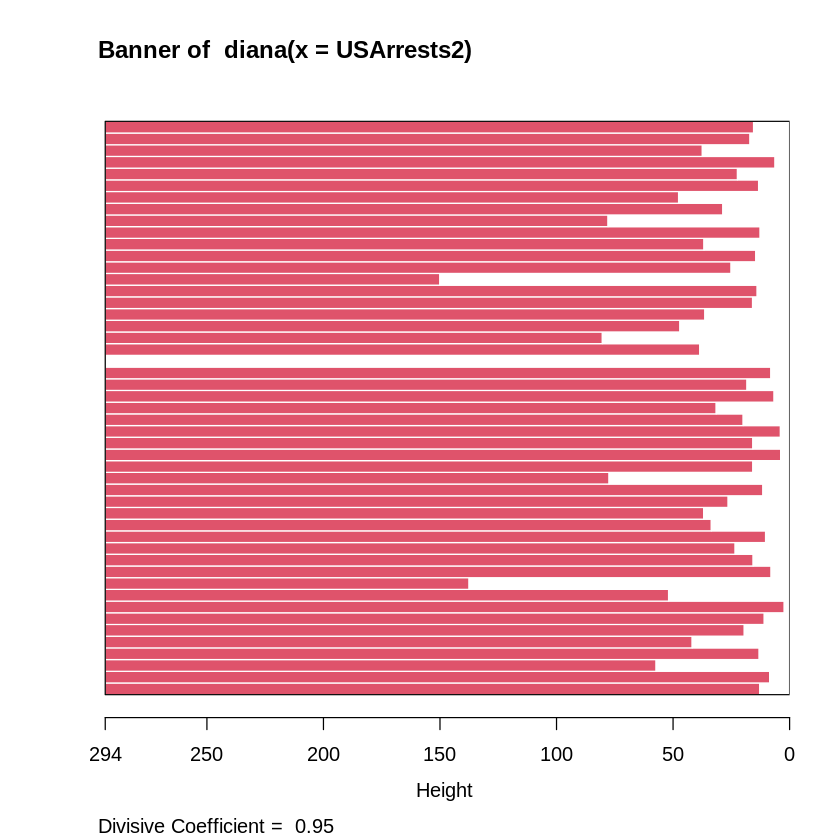

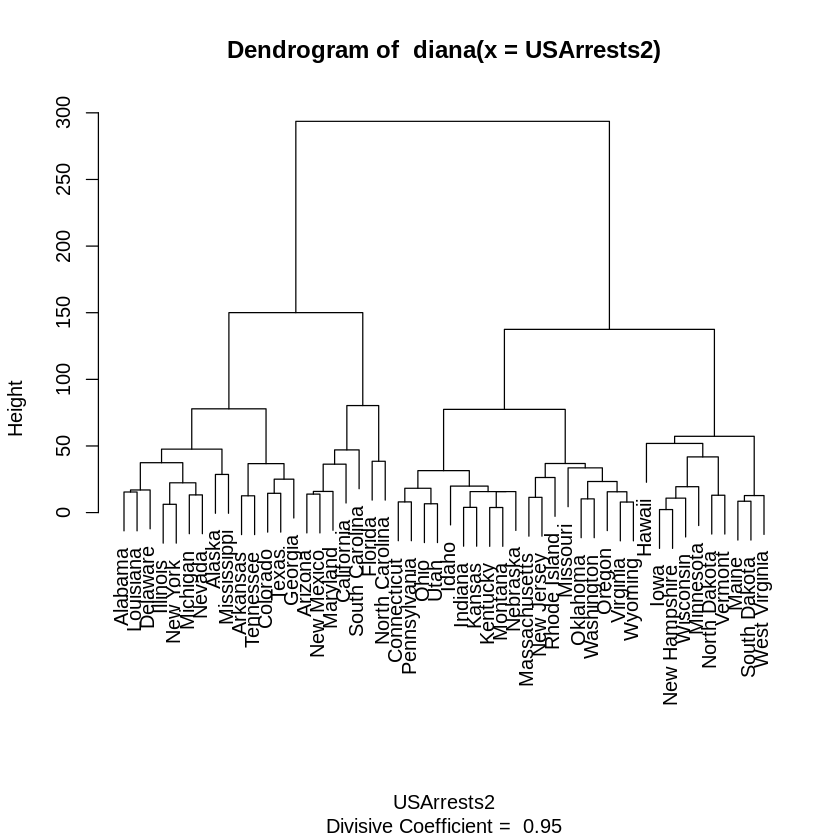

In [31]:
#나무그림
plot(USA.divclustering)

In [32]:
#평균연결법을 바탕으로 한 k평균
USA.initial.aver = tapply(USArrests2, list(rep(cutree(USA.hclusting3, 3), ncol(USArrests2)), col(USArrests2)), mean)
USA.kmeans.aver = kmeans(USArrests2, USA.initial.aver, algorithm = 'MacQueen')

In [33]:
#평균연결법을 바탕으로 k-평균
USA.kmeans.aver

K-means clustering with 3 clusters of sizes 16, 14, 20

Cluster means:
     Murder  Assault UrbanPop     Rape
1 11.812500 272.5625 68.31250 28.37500
2  8.214286 173.2857 70.64286 22.84286
3  4.270000  87.5500 59.75000 14.39000

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1          